## Challenge_Hypothesis Testing

In this challenge, you will consider the state of North Carolina data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. 

**The following is the variable descriptions**

| variable         | description |
| ---------------- | ------------|
| `fage`           | father's age in years. |
| `mage`           | mother's age in years. |
| `mature`         | maturity status of mother. |
| `weeks`          | length of pregnancy in weeks. |
| `premie`         | whether the birth was classified as premature (premie) or full-term. |
| `visits`         | number of hospital visits during pregnancy. |
| `marital`        | whether mother is `married` or `not married` at birth. |
| `gained`         | weight gained by mother during pregnancy in pounds. |
| `weight`         | weight of the baby at birth in pounds. |
| `lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`). |
| `gender`         | gender of the baby, `female` or `male`. |
| `habit`          | status of the mother as a `nonsmoker` or a `smoker`. |
| `whitemom`       | whether mom is `white` or `not white`. |

**Based on this data, perform the following tasks**:


- Make a side-by-side boxplot of habit and weight. What does the plot highlight about the relationship between these two variables?

- Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.

- Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

- Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.

In [6]:
%matplotlib inline
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [7]:
df = pd.read_csv('nc (1).csv')
print (df)


     fage  mage       mature  weeks     premie  visits      marital  gained  \
0     NaN    13  younger mom   39.0  full term    10.0      married    38.0   
1     NaN    14  younger mom   42.0  full term    15.0      married    20.0   
2    19.0    15  younger mom   37.0  full term    11.0      married    38.0   
3    21.0    15  younger mom   41.0  full term     6.0      married    34.0   
4     NaN    15  younger mom   39.0  full term     9.0      married    27.0   
..    ...   ...          ...    ...        ...     ...          ...     ...   
995  47.0    42   mature mom   40.0  full term    10.0  not married    26.0   
996  34.0    42   mature mom   38.0  full term    18.0  not married    20.0   
997  39.0    45   mature mom   40.0  full term    15.0  not married    32.0   
998  55.0    46   mature mom   31.0     premie     8.0  not married    25.0   
999  45.0    50   mature mom   39.0  full term    14.0  not married    23.0   

     weight lowbirthweight  gender      habit   whi

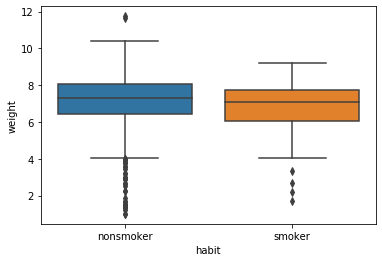

In [8]:
#question1
sns.boxplot(x='habit', y='weight', data=df)

# question 2
Population: weights of babies born to smoking and non-smoking
Parameter of Interest: 𝜇
Average weights of babies born to smoking and non-smoking mothers are different.
Null Hypothesis: 𝜇(1) = 𝜇(2)
Alternative Hypthosis: 𝜇()1!= 𝜇(2) 
where: 𝜇(1) = average weight of babies born to smoking mothers
       𝜇(2) = average weight of babies born to non-smoking

In [16]:
df2 = df[['mage','mature']]
print (df2)
df2['mage'].mean()

     mage       mature
0      13  younger mom
1      14  younger mom
2      15  younger mom
3      15  younger mom
4      15  younger mom
..    ...          ...
995    42   mature mom
996    42   mature mom
997    45   mature mom
998    46   mature mom
999    50   mature mom

[1000 rows x 2 columns]


27.0

In [60]:
younger_mom = df2[df2["mature"] =="younger mom"]
Mature_mom= df2[df2["mature"]  =="mature mom"]


In [61]:
Mature_mom= df2[df2["mature"]  =="mature mom"]

In [58]:
n1 = len(younger_mom)
mu1 = younger_mom["mage"].mean()
sd1 = younger_mom["mage"].std()
print(n1,mu1,sd1)

867 25.43829296424452 5.027803605144285


In [63]:
n2 = len(Mature_mom)
mu2 = Mature_mom["mage"].mean()
sd2 = Mature_mom["mage"].std()
print(n2,mu2,sd2)

133 37.18045112781955 2.4303466097301314


In [64]:
sm.stats.ztest(younger_mom["mage"].dropna(), Mature_mom["mage"].dropna(),alternative='two-sided')

(-26.455263926063754, 3.1738309845004406e-154)

Conclusion of the hypothesis test
since p-value(3.173) is extreme large, and is greater than our level of significanc, which is 0.05, we acceptthe null hypothesis and conclude that the mean or average weight gained by younger mothers is different than the average weight gained by mature mothers.